In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

In [3]:
Psi = np.array([[1, 0], [0,1], [1,1]])


In [4]:
Y = np.array([[1], [5], [2]])


In [5]:
F = Psi.T @ Psi
F_inv = np.linalg.inv(F)


In [6]:
beta = F_inv @ Psi.T @ Y
print(f'w = {beta[0][0]}e + {beta[1][0]}n')

w = -0.33333333333333337e + 3.6666666666666665n


Оптимальный параметр регуляризации: alpha = 1.4906354515050169


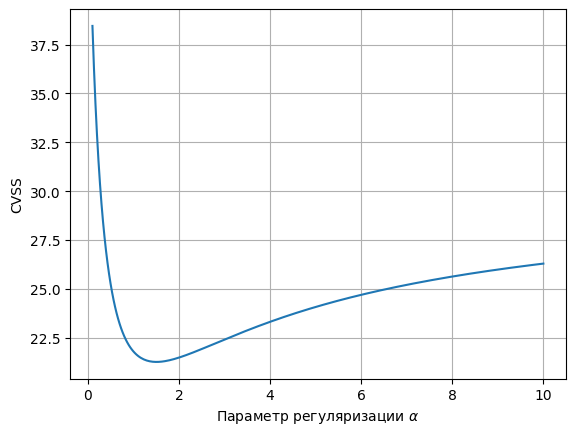

In [17]:
alpha = np.linspace(0.1, 10, num=300)
CVSS = []
for a in alpha:
    CVSS_i = 0
    n = Y.shape[0]
    for i in range(n):
        mask = np.ones(n, dtype=bool)
        mask[i]= False
        beta = Ridge(alpha = a, fit_intercept=False).fit(Psi[mask], Y[mask]).coef_
        y_pred = Psi[i] @ beta.T
        CVSS_i += np.square(Y[i] - y_pred)
    CVSS.append(CVSS_i)
print(f"Оптимальный параметр регуляризации: alpha = {alpha[np.argmin(CVSS)]}")
fig, ax = plt.subplots(1, 1)
ax.plot(alpha, CVSS)
ax.set_ylabel("CVSS")
ax.set_xlabel(r"Параметр регуляризации $\alpha$")
ax.grid()

Оптимальный параметр регуляризации: alpha = 5.993645484949833


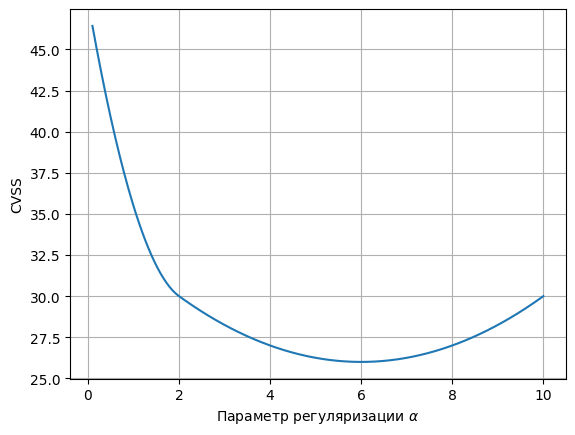

In [13]:
alpha = np.linspace(0.1, 10, num=300)
CVSS = []
for a in alpha:
    CVSS_i = 0
    n = Y.shape[0]
    for i in range(n):
        mask = np.ones(n, dtype=bool)
        mask[i]= False
        beta = Lasso(alpha = a / 4, fit_intercept=False).fit(Psi[mask], Y[mask]).coef_
        y_pred = Psi[i] @ beta
        CVSS_i += np.square(Y[i] - y_pred)
    CVSS.append(CVSS_i)
print(f"Оптимальный параметр регуляризации: alpha = {alpha[np.argmin(CVSS)]}")
fig, ax = plt.subplots(1, 1)
ax.plot(alpha, CVSS)
ax.set_ylabel("CVSS")
ax.set_xlabel(r"Параметр регуляризации $\alpha$")
ax.grid()